# Analyse GANN training

## Init

Load libraries

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#sessionInfo()
#reticulate::py_install(packages = 'umap-learn')

Set paths

In [3]:
paths.train_nonorm_path <- "../data/tpm_combined_train_nonorm.csv"
paths.test_nonorm_path <- "../data/tpm_combined_test_nonorm.csv"
paths.gen_1_path <- "../data/results/gen_prof_5100.csv"

## Load and visualise

Load unnormalised training data

In [4]:
train_nonorm_raw <- read.table(file=paths.train_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(train_nonorm_raw)

,P1.3.A10,P1.3.A11,P1.3.A12,P1.3.A2,P1.3.A4,P1.3.A5,P1.3.A6,P1.3.A7,P1.3.A8,P1.3.B3,⋯,GHA501A85,GHA501A86,GHA501A88,GHA501A89,GHA501A90,GHA501A94,GHA501A95,GHA501A98,GHA501A99,GHA501A9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,0.000000,0.000000,0.000000,3.051372,5.617063,0.000000,0.0000000,3.526069,⋯,7.7553921,1.241720,6.2614044,6.480059,4.7291586,6.4899840,1.092268,3.6619208,3.921598,0.000000
Cd47,6.033863,5.564378,4.365972,6.768714,5.736875,4.075533,6.556276,4.442280,4.7147950,5.123914,⋯,8.8863576,9.001691,8.5115705,7.932110,7.6587774,6.0236338,10.458879,7.5448340,8.581246,9.770376
Elmo2,5.838195,0.000000,5.755422,7.441948,5.530757,6.876149,6.384568,7.330200,6.6519127,5.215679,⋯,6.7044797,5.044924,5.3982323,2.299830,0.7719891,1.2724215,2.308829,2.1354247,6.343773,3.824600
Crip2,3.327687,7.560868,0.000000,6.962318,5.048759,5.891905,0.000000,0.000000,4.4289463,4.556429,⋯,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000
Pprc1,5.766860,0.000000,5.279471,4.466627,4.186659,2.851999,2.272023,5.751410,0.8318772,5.511595,⋯,3.8067596,0.000000,1.0618995,4.385497,1.6626486,0.0000000,0.000000,0.7437538,2.725903,1.069900
Ccdc174,1.372952,0.000000,0.000000,5.659925,2.981853,0.000000,0.000000,1.879706,0.0000000,1.589763,⋯,0.3346734,4.237288,0.5734587,5.510105,2.3899220,0.9136959,5.156094,2.6889399,1.939234,6.256904


Load unnormalised test data

In [5]:
test_nonorm_raw <- read.table(file=paths.test_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(test_nonorm_raw)

,P1.3.A3,P1.3.B10,P1.3.B12,P1.3.B2,P1.3.B8,P1.3.D1,P1.3.D12,P1.3.D9,P1.3.E1,P1.3.E4,⋯,GHA501A41,GHA501A47,GHA501A48,GHA501A54,GHA501A69,GHA501A70,GHA501A72,GHA501A74,GHA501A83,GHA501A93
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,4.703765,0.000000,0.000000,5.227279,4.800641,0.0000000,0.0000000,0.000000,⋯,0.5448804,0.7823517,0.6369969,2.175254,0.000000,1.7801001,3.801378,0.7655439,0.000000,3.4088070
Cd47,0.000000,3.196922,5.099716,2.918386,5.226123,0.000000,3.658783,3.0373822,0.0000000,7.142720,⋯,2.7807633,8.4777158,9.2550843,8.408633,6.871060,9.2950091,4.947373,8.5891534,9.918273,9.7571295
Elmo2,8.091382,5.988912,6.964745,4.581351,6.436295,4.409391,4.185867,4.3490821,0.3561438,7.410918,⋯,5.6864396,0.7812074,0.0000000,2.647312,0.000000,0.5416181,0.000000,3.9701527,2.691955,1.6911530
Crip2,7.533408,0.000000,3.824768,0.000000,0.000000,0.000000,0.000000,5.8872816,3.7516779,0.000000,⋯,8.1795533,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.9078236,0.000000,0.0000000
Pprc1,0.000000,2.914565,4.851999,5.107269,3.198494,4.257765,5.157044,0.0000000,0.4114262,3.766595,⋯,0.3990446,2.5846768,0.0000000,3.723433,4.377274,0.2765536,3.884531,0.3138547,0.000000,0.5628152
Ccdc174,0.000000,2.704872,2.817623,3.266037,4.399855,4.531693,3.204767,0.6322682,1.7355222,0.000000,⋯,1.4413852,1.7464567,1.0269647,4.373164,4.417183,5.3613503,0.000000,0.0000000,5.389610,1.6996514


Load gen prof-1

In [6]:
genprof_1_raw <- read.table(file=paths.gen_1_path, sep=",", row.names = 1, header=TRUE)
head(genprof_1_raw)

,gencell_ep5100_0,gencell_ep5100_1,gencell_ep5100_2,gencell_ep5100_3,gencell_ep5100_4,gencell_ep5100_5,gencell_ep5100_6,gencell_ep5100_7,gencell_ep5100_8,gencell_ep5100_9,⋯,gencell_ep5100_490,gencell_ep5100_491,gencell_ep5100_492,gencell_ep5100_493,gencell_ep5100_494,gencell_ep5100_495,gencell_ep5100_496,gencell_ep5100_497,gencell_ep5100_498,gencell_ep5100_499
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,2.702126,2.735361,2.708194,2.801228,2.513061,2.613419,2.716925,2.735347,2.676500,2.879899,⋯,2.726134,2.604155,2.623656,2.734402,2.550834,2.813951,2.622112,2.682436,2.465402,2.688415
Cd47,3.490354,3.424019,4.038642,3.719401,4.295436,3.693854,4.143137,3.985871,3.796396,3.750263,⋯,3.520420,3.314821,3.864032,3.466648,3.613517,3.580545,3.909669,3.931545,4.352427,3.741285
Elmo2,2.890546,2.875002,2.848153,2.870452,2.828568,2.833987,2.639313,2.943544,2.755596,2.854849,⋯,2.751454,2.797033,2.822198,2.936323,2.827144,2.795012,2.571715,2.822281,2.789943,2.839742
Crip2,3.154041,3.951116,3.435989,3.853369,4.268759,3.208727,3.728476,3.466102,3.432030,3.464443,⋯,3.240690,3.102090,3.638666,3.930675,3.827000,3.261778,3.631890,3.338518,3.615312,3.412679
Pprc1,6.950587,7.693529,7.067348,7.204711,6.897238,7.500334,6.890010,5.978166,7.117502,6.761358,⋯,7.149828,7.312492,7.361910,6.484554,7.078155,6.934451,7.932741,6.597225,8.026635,6.286946
Ccdc174,2.117783,2.022977,2.120792,1.955304,2.292685,2.155502,2.390426,2.269234,2.382512,2.273045,⋯,2.117586,2.001970,2.146739,2.283772,1.835632,2.188512,2.004724,1.988195,1.977662,2.215757


Create Seurat objects

In [7]:
train_nonorm <- CreateSeuratObject(counts = train_nonorm_raw, project="wgan_train")
train_nonorm

An object of class Seurat 
6807 features across 1798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [8]:
test_nonorm <- CreateSeuratObject(counts = test_nonorm_raw, project="wgan_test")
test_nonorm

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [9]:
gen_prof_1 <- CreateSeuratObject(counts = genprof_1_raw, project="gen_prof_1")
gen_prof_1

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

Merge together

In [10]:
data_combined <- merge(train_nonorm, y = list(test_nonorm, gen_prof_1), add.cell.ids = c("Train", "Test", "Gen1"), project = "wgan")
data_combined

An object of class Seurat 
6807 features across 2798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [11]:
table(data_combined$orig.ident)


   gencell  wgan_test wgan_train 
       500        500       1798 

## Perform QC

In [12]:
# Look at some canonical marker genes and metrics
#VlnPlot(train_nonorm,c("ENSMUSG00000000001","ENSMUSG00000000056","ENSMUSG00000000058","ENSMUSG00000000078"))

## Normalise and scale data

In [13]:
data_combined <- NormalizeData(data_combined)

In [14]:
data_combined <- FindVariableFeatures(data_combined, selection.method = "vst", nfeatures = 2000)

In [15]:
all.genes <- rownames(data_combined)
data_combined <- ScaleData(object = data_combined, features = all.genes)

Centering and scaling data matrix



## Dim reduction

In [16]:
data_combined <- RunPCA(object = data_combined, features = VariableFeatures(object = data_combined))

PC_ 1 
Positive:  Rplp1, Rps29, Eef1a1, Rps3a1, Rpl39, Rpl35, B2m, Perp, Hspb1, S100a11 
	   Sbsn, Anxa8, Lgals7, Anxa2, Dmkn, Tmsb4x, Krt10, Klf4, Rpl8, Krt15 
	   Sdc4, Fam25c, Sfn, Ly6d, Krtdap, Apoe, Rps12, Dapl1, Calm4, Tacstd2 
Negative:  Mib1, Lcor, Arhgef15, Zfp940, Pola2, Tex9, Racgap1, Slfn9, Tnfrsf22, Supt20 
	   Pdlim7, Dvl3, Ankrd52, Abhd2, Spred2, Gnpda1, Zfp451, Mad2l1, Tmem245, Fmnl2 
	   Zfp316, Zfp398, Mbd4, Alox8, Kansl2, Gpr137b, Nup107, Atr, Basp1, Smyd5 
PC_ 2 
Positive:  Rab31, Ccdc84, Glipr1, Atad2, Zfp948, Hmmr, Pex1, Tnfrsf10b, Ankib1, Nol10 
	   Gpx8, Yeats4, Impact, Tipin, Mrpl42, Pdpn, Dynlt1a, Ybey, Rhoc, Fam162a 
	   Gatad1, Haus1, Enc1, Cstf2t, Bnip3, Zfhx3, Ndufaf7, Dynlt1b, Galk1, Sh3bgrl 
Negative:  Skint4, Hal, Lsr, AA986860, Paqr5, Sema4g, Tfap2b, Tmprss4, Abca12, Apoc1 
	   Ppfibp2, Tenm2, Nrarp, Plbd1, Arhgap32, Hs3st6, Spink5, Osbpl1a, Il1rn, B3gnt2 
	   Calml3, Gdpd2, Rpl19, Capn1, Ly6g6e, Sema3d, Dmkn, Notch1, Ptpn21, Rab27b 
PC_ 3 
Positive:  

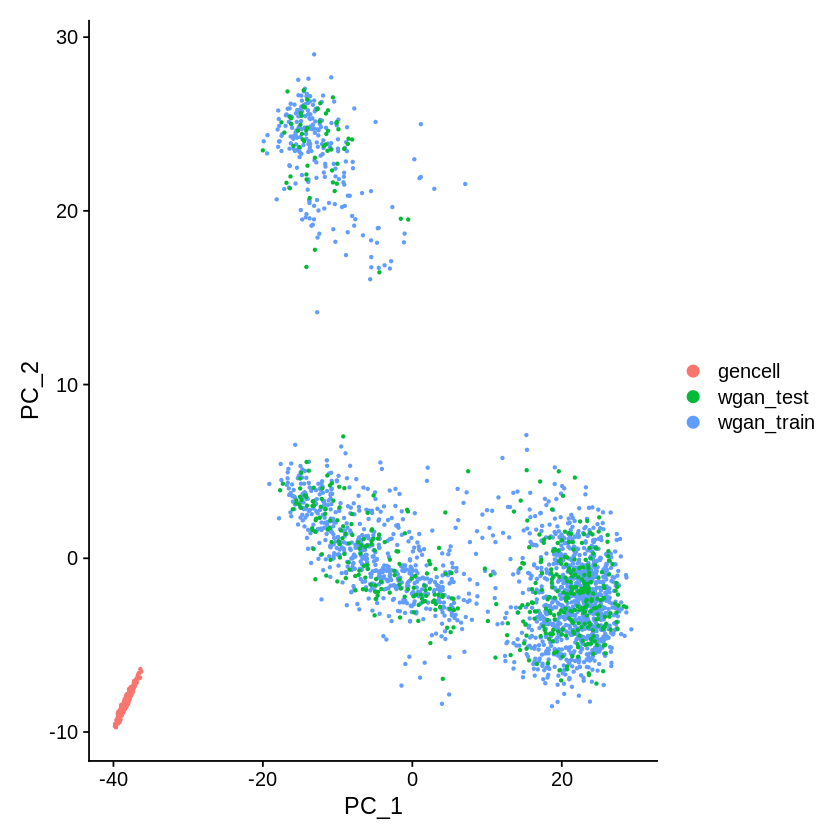

In [17]:
DimPlot(data_combined, reduction = "pca")

In [ ]:
data_combined <- RunTSNE(object = data_combined, dims = 3:10)

In [ ]:
DimPlot(data_combined, reduction = "tsne")